# EDA and Machine Learning - Car Insurance Claim Data

This is a project in which I use _Car Insurance Claim_ Dataset from Kaggle to generate some insights about car insurance claims and see what factors will make customers more likely to be 'repeat offenders'. First, I clean the data and create some new features using pandas. Then I create visualizations of said data using matplotlib and seaborn. Finally, I apply machine learning models (sklearn) to predict which customers will make repeat insurance claims. Tasks include:

### Data Preprocessing:
- Create target variable 'repeat'
- Convert data types to numeric 
- Remove unnecessary columns
- Fill in and/or remove null values
- Clean up messy string data entries
- Export cleaned csv file

### Exploratory Data Analysis:
- Create visualizations to determine what attributes lead to repeat insurance claims
- Make use of matplotlib and seaborn to create graphs that are easy to understand
- Separate numerical variables into categorical data for plotting
- Use visualizations to determine whether or not a variable is suitable for our ML model

### Machine Learning:
- Create target variable and feature dataframe
- Convert categorical data types to numeric
- Split dataset into training and test data
- Scale training data
- Run different categorical machine learning models: 
    - Gaussian Naive Bayes
    - Logistic Regression
    - Support Vector Machines
    - Random Forest
    - k-Nearest Neighbors
- Tune hyperparameters to increase model accuracy
- Analyze feature importance
- Run various tests to determine best model

### Final product is a model which takes in # of Demerit Points, Age, Car Crash Status, and Urbanicity and predicts with 75.35% accuracy whether a customer will make more than one insurance claim.


## Part 1: Imports

In [1]:
# import data processing and visualization libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns
%matplotlib inline





## Part 2: Data Preprocessing

In [2]:
# import our csv data as df and take a look
df = pd.read_csv('car_insurance_claim_data.csv')
df.head()

,ID,KIDSDRIV,BIRTH,AGE,HOMEKIDS,YOJ,INCOME,PARENT1,HOME_VAL,MSTATUS,...,CAR_TYPE,RED_CAR,OLDCLAIM,CLM_FREQ,REVOKED,MVR_PTS,CLM_AMT,CAR_AGE,CLAIM_FLAG,URBANICITY
0,63581743,0,16MAR39,60.0,0,11.0,"$67,349",No,$0,z_No,...,Minivan,yes,"$4,461",2,No,3,$0,18.0,0,Highly Urban/ Urban
1,132761049,0,21JAN56,43.0,0,11.0,"$91,449",No,"$257,252",z_No,...,Minivan,yes,$0,0,No,0,$0,1.0,0,Highly Urban/ Urban
2,921317019,0,18NOV51,48.0,0,11.0,"$52,881",No,$0,z_No,...,Van,yes,$0,0,No,2,$0,10.0,0,Highly Urban/ Urban
3,727598473,0,05MAR64,35.0,1,10.0,"$16,039",No,"$124,191",Yes,...,z_SUV,no,"$38,690",2,No,3,$0,10.0,0,Highly Urban/ Urban
4,450221861,0,05JUN48,51.0,0,14.0,NaN,No,"$306,251",Yes,...,Minivan,yes,$0,0,No,0,$0,6.0,0,Highly Urban/ Urban


In [3]:
# view the columns of the dataframe to get a feel for the data
df.columns

Index(['ID', 'KIDSDRIV', 'BIRTH', 'AGE', 'HOMEKIDS', 'YOJ', 'INCOME',
       'PARENT1', 'HOME_VAL', 'MSTATUS', 'GENDER', 'EDUCATION', 'OCCUPATION',
       'TRAVTIME', 'CAR_USE', 'BLUEBOOK', 'TIF', 'CAR_TYPE', 'RED_CAR',
       'OLDCLAIM', 'CLM_FREQ', 'REVOKED', 'MVR_PTS', 'CLM_AMT', 'CAR_AGE',
       'CLAIM_FLAG', 'URBANICITY'],
      dtype='object')

What do these columns represent? Here's a table describing each variable:

| Column name | Description                               |
|-------------|-------------------------------------------|
| ID          | Customer ID Number                        |
| KIDSDRIV    | # of children (teenagers) driving the car |
| BIRTH       | Date of birth                             |
| AGE         | Age of driver                             |
| HOMEKIDS    | # of children at home                     |
| YOJ         | Years on job                              |
| INCOME      | Income                                    |
| PARENT1     | Single parent y/n                         |
| HOME_VAL    | Value of home                             |
| MSTATUS     | Marital status                            |
| GENDER      | Gender                                    |
| EDUCATION   | Maximum education level                   |
| OCCUPATION  | Occupation                                |
| TRAVTIME    | Distance to work                          |
| CAR_USE     | Vehicle use                               |
| BLUEBOOK    | Value of vehicle                          |
| TIF         | Time in force                             |
| CAR_TYPE    | Type of car                               |
| RED_CAR     | Red car y/n                               |
| OLDCLAIM    | Payouts, last 5 years                     |
| CLM_FREQ    | # of claims, last 5 years                 |
| REVOKED     | License revoked past 7 years y/n          |
| MVR_PTS     | Motor vehicle record points (demerits)    |
| CLM_AMT     | Claim amount                              |
| CAR_AGE     | Vehicle age                               |
| CLAIM_FLAG  | Was car in a crash y/n                    |
| URBANICITY  | Home/work area                            |

To simplify our data and save some memory, I'm going to drop the ID column because it doesn't represent any relevant information.

In [4]:
df = df.drop(labels='ID', axis=1)

Since every customer in this dataset has made a claim, it'll be hard to draw conclusions from the data as is. Instead, I'm going to use the information in the CLM_FREQ column to create a target variable: if a customer has had 1 or more claims in the past 5 years, we'll call them a "repeat offender". Then we can use the rest of the data to see which customer attributes lead to them becoming repeat offenders.

In [5]:
df.CLM_FREQ.value_counts()

0    6292
2    1492
1    1279
3     992
4     225
5      22
Name: CLM_FREQ, dtype: int64

In [6]:
# creating a new 'repeat offender' column: 1 if they have had 1 or more claims in the last 5 years, 0 if not.
df['REPEAT'] = df.CLM_FREQ.apply(lambda x: 0 if x == 0 else 1)

In [7]:
df.head()

,KIDSDRIV,BIRTH,AGE,HOMEKIDS,YOJ,INCOME,PARENT1,HOME_VAL,MSTATUS,GENDER,...,RED_CAR,OLDCLAIM,CLM_FREQ,REVOKED,MVR_PTS,CLM_AMT,CAR_AGE,CLAIM_FLAG,URBANICITY,REPEAT
0,0,16MAR39,60.0,0,11.0,"$67,349",No,$0,z_No,M,...,yes,"$4,461",2,No,3,$0,18.0,0,Highly Urban/ Urban,1
1,0,21JAN56,43.0,0,11.0,"$91,449",No,"$257,252",z_No,M,...,yes,$0,0,No,0,$0,1.0,0,Highly Urban/ Urban,0
2,0,18NOV51,48.0,0,11.0,"$52,881",No,$0,z_No,M,...,yes,$0,0,No,2,$0,10.0,0,Highly Urban/ Urban,0
3,0,05MAR64,35.0,1,10.0,"$16,039",No,"$124,191",Yes,z_F,...,no,"$38,690",2,No,3,$0,10.0,0,Highly Urban/ Urban,1
4,0,05JUN48,51.0,0,14.0,NaN,No,"$306,251",Yes,M,...,yes,$0,0,No,0,$0,6.0,0,Highly Urban/ Urban,0


In [8]:
# overview of datatypes in each column
df.dtypes

KIDSDRIV        int64
BIRTH          object
AGE           float64
HOMEKIDS        int64
YOJ           float64
INCOME         object
PARENT1        object
HOME_VAL       object
MSTATUS        object
GENDER         object
EDUCATION      object
OCCUPATION     object
TRAVTIME        int64
CAR_USE        object
BLUEBOOK       object
TIF             int64
CAR_TYPE       object
RED_CAR        object
OLDCLAIM       object
CLM_FREQ        int64
REVOKED        object
MVR_PTS         int64
CLM_AMT        object
CAR_AGE       float64
CLAIM_FLAG      int64
URBANICITY     object
REPEAT          int64
dtype: object

As we can see above, we have some columns which should be represented numerically but are currently in string form. We'll convert the contents of these columns to numeric so we have them in the correct form for analysis later. In this dataset, these columns seem to be all of the variables represented by dollar values. These columns are: income, home value, bluebook value, claim amount, and old claim (payouts, last 5 years). I'll create a function called to_numeric that will take care of this for us.

In [9]:
# takes a list of column names and a df and performs the following, in place, on the dataframe (doesn't return anything):
# converts to string to prevent any type errors
# removes dollar signs and comma from dollar values
# converts result to numeric using pandas
def to_numeric(list_of_columns, df=df):
    for i in list_of_columns:
        df[i] = df[i].astype(str)
        df[i] = df[i].apply(lambda x: x.replace('$','')).apply(lambda x: x.replace(',',''))
        df[i] = pd.to_numeric(df[i], errors = 'coerce')


In [10]:
list_of_cols = ['INCOME', 'HOME_VAL', 'BLUEBOOK', 'CLM_AMT', 'OLDCLAIM']
to_numeric(list_of_cols)

In [11]:
df[list_of_cols].dtypes

INCOME      float64
HOME_VAL    float64
BLUEBOOK      int64
CLM_AMT       int64
OLDCLAIM      int64
dtype: object

The 5 columns were converted to numeric datatypes and are ready for analysis later. Next, we'll check for null values:

In [12]:
# check for null values
df.isnull().sum()

KIDSDRIV        0
BIRTH           0
AGE             7
HOMEKIDS        0
YOJ           548
INCOME        570
PARENT1         0
HOME_VAL      575
MSTATUS         0
GENDER          0
EDUCATION       0
OCCUPATION    665
TRAVTIME        0
CAR_USE         0
BLUEBOOK        0
TIF             0
CAR_TYPE        0
RED_CAR         0
OLDCLAIM        0
CLM_FREQ        0
REVOKED         0
MVR_PTS         0
CLM_AMT         0
CAR_AGE       639
CLAIM_FLAG      0
URBANICITY      0
REPEAT          0
dtype: int64

Every column containing null values is a numeric column, except OCCUPATION. Looking at the dataframe below, it seems that having no information for occupation doesn't affect the data in the rest of the columns. So we'll leave the occupation column alone.

In [13]:
df[df.OCCUPATION.isnull()].head()

,KIDSDRIV,BIRTH,AGE,HOMEKIDS,YOJ,INCOME,PARENT1,HOME_VAL,MSTATUS,GENDER,...,RED_CAR,OLDCLAIM,CLM_FREQ,REVOKED,MVR_PTS,CLM_AMT,CAR_AGE,CLAIM_FLAG,URBANICITY,REPEAT
16,0,19JUL46,53.0,0,11.0,130795.0,No,0.0,z_No,M,...,yes,0,0,No,3,1267,10.0,1,Highly Urban/ Urban,0
40,0,28SEP58,41.0,0,7.0,92842.0,No,286113.0,z_No,M,...,no,1431,2,No,5,0,15.0,0,Highly Urban/ Urban,1
45,0,01JUN56,43.0,2,17.0,145353.0,No,418785.0,Yes,z_F,...,no,0,0,No,0,0,15.0,0,Highly Urban/ Urban,0
77,0,05SEP50,49.0,0,9.0,NaN,No,0.0,z_No,M,...,no,34351,2,Yes,2,0,18.0,0,Highly Urban/ Urban,1
80,0,01JAN53,46.0,0,14.0,NaN,No,397661.0,z_No,M,...,yes,0,0,Yes,1,0,12.0,0,Highly Urban/ Urban,0


As for the numeric columns, it is possible for their value to truly be 0. For example, if the customer did not have a job or own a house, then their income or their home value would be $0. For this reason, I won't replace all null values with 0. Instead, I'll replace the null values in each column with the mean of that column.

In [14]:
df.mean()

KIDSDRIV           0.169288
AGE               44.837397
HOMEKIDS           0.720443
YOJ               10.474062
INCOME         61572.073263
HOME_VAL      154523.018608
TRAVTIME          33.416424
BLUEBOOK       15659.923316
TIF                5.329159
OLDCLAIM        4033.977868
CLM_FREQ           0.800718
MVR_PTS            1.710153
CLM_AMT         1511.266453
CAR_AGE            8.298148
CLAIM_FLAG         0.266550
REPEAT             0.389245
dtype: float64

In [15]:
df = df.fillna(df.mean())

In [16]:
df.isnull().sum()

KIDSDRIV        0
BIRTH           0
AGE             0
HOMEKIDS        0
YOJ             0
INCOME          0
PARENT1         0
HOME_VAL        0
MSTATUS         0
GENDER          0
EDUCATION       0
OCCUPATION    665
TRAVTIME        0
CAR_USE         0
BLUEBOOK        0
TIF             0
CAR_TYPE        0
RED_CAR         0
OLDCLAIM        0
CLM_FREQ        0
REVOKED         0
MVR_PTS         0
CLM_AMT         0
CAR_AGE         0
CLAIM_FLAG      0
URBANICITY      0
REPEAT          0
dtype: int64

Null values taken care of. Next, we'll clean some of the columns that have a strange 'z_' before their data (see Education column above, for example). After some exploration, I found that there was 1 value in each of the following columns with the 'z_' suffix, so I replaced each of those values with the proper value using lambda functions.

In [17]:
df.MSTATUS = df.MSTATUS.apply(lambda x: 'No' if x == 'z_No' else x)
df.GENDER = df.GENDER.apply(lambda x: 'F' if x == 'z_F' else x)
df.EDUCATION = df.EDUCATION.apply(lambda x: 'High School' if x == 'z_High School' else x)
df.OCCUPATION = df.OCCUPATION.apply(lambda x: 'Blue Collar' if x == 'z_Blue Collar' else x)
df.CAR_TYPE = df.CAR_TYPE.apply(lambda x: 'SUV' if x == 'z_SUV' else x)
df.URBANICITY = df.URBANICITY.apply(lambda x: 'Highly Rural/ Rural' if x == 'z_Highly Rural/ Rural' else x)

In [18]:
# Update urbanicity values to be more readable
df['URBANICITY'] = df.URBANICITY.apply(lambda x: x[-5:])

In [19]:
df.URBANICITY.value_counts()

Urban    8230
Rural    2072
Name: URBANICITY, dtype: int64

In [20]:
# our cleaned dataset!
df

,KIDSDRIV,BIRTH,AGE,HOMEKIDS,YOJ,INCOME,PARENT1,HOME_VAL,MSTATUS,GENDER,...,RED_CAR,OLDCLAIM,CLM_FREQ,REVOKED,MVR_PTS,CLM_AMT,CAR_AGE,CLAIM_FLAG,URBANICITY,REPEAT
0,0,16MAR39,60.0,0,11.0,67349.000000,No,0.0,No,M,...,yes,4461,2,No,3,0,18.0,0,Urban,1
1,0,21JAN56,43.0,0,11.0,91449.000000,No,257252.0,No,M,...,yes,0,0,No,0,0,1.0,0,Urban,0
2,0,18NOV51,48.0,0,11.0,52881.000000,No,0.0,No,M,...,yes,0,0,No,2,0,10.0,0,Urban,0
3,0,05MAR64,35.0,1,10.0,16039.000000,No,124191.0,Yes,F,...,no,38690,2,No,3,0,10.0,0,Urban,1
4,0,05JUN48,51.0,0,14.0,61572.073263,No,306251.0,Yes,M,...,yes,0,0,No,0,0,6.0,0,Urban,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10297,1,13AUG54,45.0,2,9.0,164669.000000,No,386273.0,Yes,M,...,no,0,0,No,2,0,17.0,0,Urban,0
10298,0,17JUN53,46.0,0,9.0,107204.000000,No,332591.0,Yes,M,...,no,0,0,No,0,0,1.0,0,Urban,0
10299,0,18JUN51,48.0,0,15.0,39837.000000,No,170611.0,Yes,F,...,no,0,0,No,0,0,1.0,0,Urban,0
10300,0,12DEC48,50.0,0,7.0,43445.000000,No,149248.0,Yes,F,...,no,0,0,No,0,0,11.0,0,Urban,0


In [21]:
df.describe()

,KIDSDRIV,AGE,HOMEKIDS,YOJ,INCOME,HOME_VAL,TRAVTIME,BLUEBOOK,TIF,OLDCLAIM,CLM_FREQ,MVR_PTS,CLM_AMT,CAR_AGE,CLAIM_FLAG,REPEAT
count,10302.000000,10302.000000,10302.000000,10302.000000,10302.000000,10302.000000,10302.000000,10302.000000,10302.000000,10302.000000,10302.000000,10302.000000,10302.000000,10302.000000,10302.000000,10302.000000
mean,0.169288,44.837397,0.720443,10.474062,61572.073263,154523.018608,33.416424,15659.923316,5.329159,4033.977868,0.800718,1.710153,1511.266453,8.298148,0.266550,0.389245
std,0.506512,8.603520,1.116323,3.998154,46125.509765,125531.029634,15.869687,8428.765264,4.110795,8733.143119,1.154079,2.159015,4725.249896,5.534371,0.442177,0.487603
min,0.000000,16.000000,0.000000,0.000000,0.000000,0.000000,5.000000,1500.000000,1.000000,0.000000,0.000000,0.000000,0.000000,-3.000000,0.000000,0.000000
25%,0.000000,39.000000,0.000000,9.000000,29164.750000,0.000000,22.000000,9200.000000,1.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,0.000000
50%,0.000000,45.000000,0.000000,11.000000,57084.000000,154523.018608,33.000000,14400.000000,4.000000,0.000000,0.000000,1.000000,0.000000,8.298148,0.000000,0.000000
75%,0.000000,51.000000,1.000000,13.000000,83231.750000,233085.000000,44.000000,20890.000000,7.000000,4647.500000,2.000000,3.000000,1144.750000,12.000000,1.000000,1.000000
max,4.000000,81.000000,5.000000,23.000000,367030.000000,885282.000000,142.000000,69740.000000,25.000000,57037.000000,5.000000,13.000000,123247.000000,28.000000,1.000000,1.000000


Export this cleaned dataset to a csv called cleaned_car_data:

In [22]:
# Writing to a CSV file
df.to_csv('cleaned_car_data.csv', index=False)

In [23]:
# read in our data
df = pd.read_csv('cleaned_car_data.csv')

## Part 3: Exploratory Data Analysis

Our target variable of interest: whether or not customers have made repeat claims. This variable is recorded in the form of a 0 if they have made 1 claim in the past five years, and a 1 if they have made more than 1 claim in the past five years.

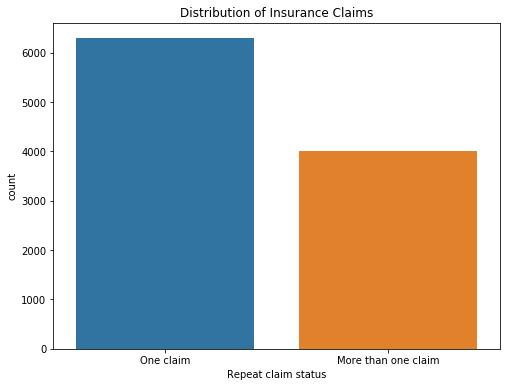

In [24]:
figure(figsize=(8,6))
sns.countplot(x='REPEAT',data=df)
plt.xlabel('Repeat claim status')
plt.xticks([0,1],labels=['One claim','More than one claim'])
plt.title('Distribution of Insurance Claims')
plt.show()

More customers in this database are first-time offenders than repeat offenders by about 2000 claims. Repeat offenders make up about 38.9% of this set of claims.

### Gender
Does gender have any influence on our target variable?

How many Male drivers made repeat claims?
39.02%
How many Female drivers made repeat claims?
38.85%


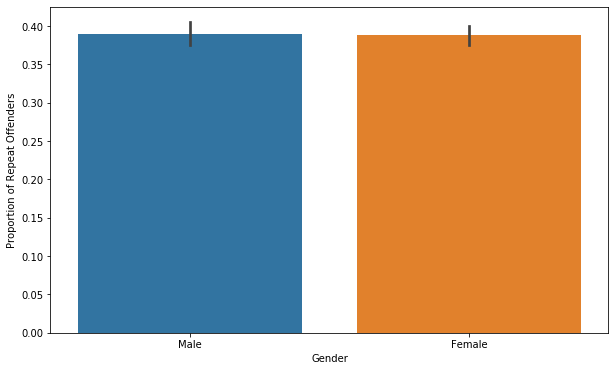

In [25]:
print("How many Male drivers made repeat claims?")
print("{:.2%}".format(df["REPEAT"][df["GENDER"] == 'M'].value_counts(normalize = True)[1]))

print("How many Female drivers made repeat claims?")
print("{:.2%}".format(df["REPEAT"][df["GENDER"] == 'F'].value_counts(normalize = True)[1]))
figure(figsize=(10,6))
sns.barplot(df.GENDER, df.REPEAT)
plt.xlabel('Gender')
plt.xticks([0,1],labels=['Male','Female'])
plt.ylabel("Proportion of Repeat Offenders")
plt.show()

Interestingly, gender seems to have almost zero effect on whether or not a customer will make more than one claim.

### Urbanicity
If a customer lives in the city, are they more likely to be a repeat offender?

How many Urban drivers made repeat claims?
45.66%
How many Rural drivers made repeat claims?
12.16%


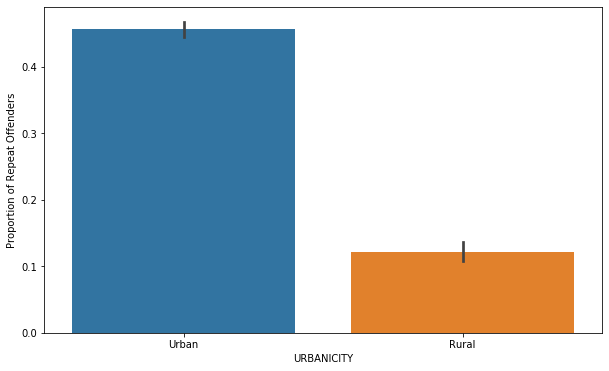

In [26]:
print("How many Urban drivers made repeat claims?")
print("{:.2%}".format(df["REPEAT"][df["URBANICITY"] == 'Urban'].value_counts(normalize = True)[1]))

print("How many Rural drivers made repeat claims?")
print("{:.2%}".format(df["REPEAT"][df["URBANICITY"] == 'Rural'].value_counts(normalize = True)[1]))
figure(figsize=(10,6))
sns.barplot(x='URBANICITY',y="REPEAT", data=df)
plt.ylabel("Proportion of Repeat Offenders")
plt.show()

We can see that Urban drivers have a much higher probability of becoming repeat offenders than those who live in Rural areas. The plots above and below show that 45.66% of all Urban drivers have made repeat claims, and that Urban drivers make up a whopping 93.7% of all repeat claims!

That is, if the client lives in the city, there's about a 45% chance that they've made more than one car insurance claim.

Further, if they've made more than one car insurance claim, there's a 93.7% chance that they live in the city!

### Demerit Points
Two questions:
- If a customer has one or more demerit points on their record, are they more likely to be a repeat offender?
- Does the likelihood of being a repeat offender increase with the number of demerit points?

How many drivers without demerits made repeat claims?
22.03%
How many drivers with demerits made repeat claims?
52.87%


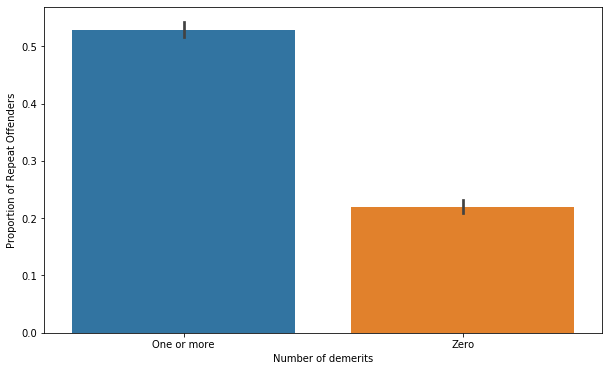

In [27]:
# we need to create a column which represents clients with 0 demerit points, and those with 1 or more.
df['DEMERITS'] = df.MVR_PTS.apply(lambda x: 'Zero' if x == 0 else 'One or more')

print("How many drivers without demerits made repeat claims?")
print("{:.2%}".format(df["REPEAT"][df["DEMERITS"] == 'Zero'].value_counts(normalize = True)[1]))

print("How many drivers with demerits made repeat claims?")
print("{:.2%}".format(df["REPEAT"][df["DEMERITS"] == 'One or more'].value_counts(normalize = True)[1]))
figure(figsize=(10,6))
sns.barplot(x='DEMERITS',y="REPEAT", data=df)
plt.xlabel('Number of demerits')
plt.ylabel("Proportion of Repeat Offenders")
plt.show()

Not surprisingly, if a driver has demerit points on their record, they're much more likely to have more than one insurance claim! Now, does the likelihood of repeat claims increase with the actual number of demerit points?

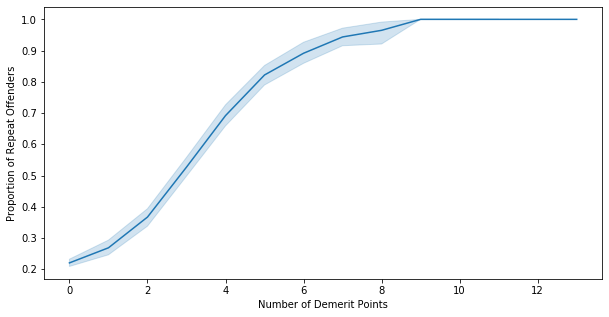

In [28]:
figure(figsize=(10,5))
sns.lineplot(x="MVR_PTS",y="REPEAT",data=df)
plt.xlabel("Number of Demerit Points")
plt.ylabel("Proportion of Repeat Offenders")
plt.show()

A clear pattern can be seen in the plot above! As the number of demerits a driver has increases, so do the odds that they will make repeat insurance claims. In fact, for those with 9 demerit points or more, **100% of them** have made more than one claim in the past 5 years!

### Age
To observe whether one age group has an increased likelihood compared to another, I'll have to sort the customers into age groups:
- 16-22 
- 22-30
- 30-40
- 40-50
- 50-60
- 60+


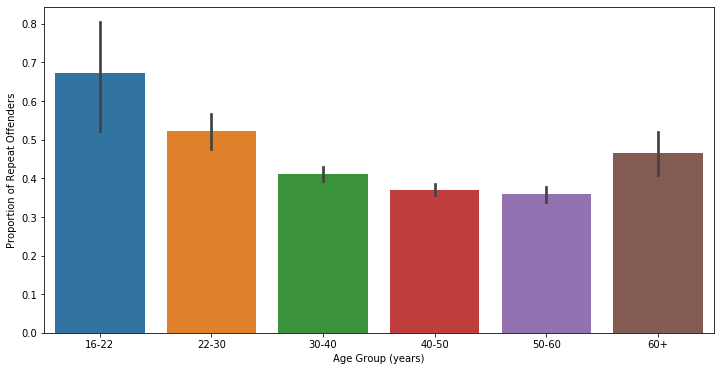

In [29]:
# sort customers into age groups
df['AGEGROUP'] = pd.cut(df["AGE"], bins = [16, 22, 30, 40, 50, 60, np.inf], labels = ['16-22', '22-30', '30-40', '40-50', '50-60', '60+'])
figure(figsize=(12,6))
sns.barplot(x='AGEGROUP',y="REPEAT", data=df)
plt.xlabel("Age Group (years)")
plt.ylabel("Proportion of Repeat Offenders")
plt.show()

Younger drivers, those in the age group of either 16-22 or 22-30, are at the highest risk of making repeat insurance claims.

### Income
This step also requires some feature engineering: I'll sort each customer into an income bracket before visualizing the data.

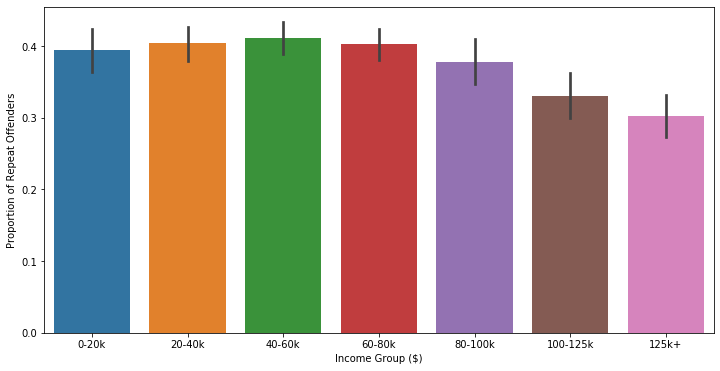

In [30]:
# sort customers into income groups
df['INCOMEGROUP'] = pd.cut(df["INCOME"], bins = [0, 20000, 40000, 60000, 80000, 100000, 125000, np.inf], labels = ['0-20k', '20-40k', '40-60k', '60-80k', '80-100k', '100-125k', '125k+'])

figure(figsize=(12,6))
sns.barplot(x='INCOMEGROUP',y="REPEAT", data=df)
plt.xlabel("Income Group ($)")
plt.ylabel("Proportion of Repeat Offenders")
plt.show()

Income doesn't seem to have a huge effect on the likelihood of repeat offenses, other than a small dip after income surpasses $100,000.

### License Revoked?
I would expect those drivers who've had their license revoked in the past seven years to drive more dangerously, and thus lead to an increase in repeat claims.

How many drivers who've had their license revoked made repeat claims?
48.69%
How many drivers who haven't had their license revoked made repeat claims?
37.56%


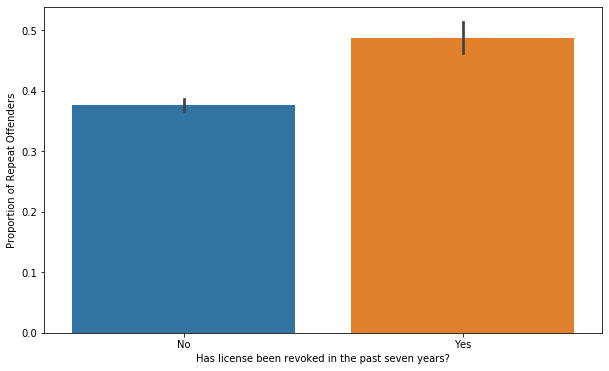

In [31]:
print("How many drivers who've had their license revoked made repeat claims?")
print("{:.2%}".format(df["REPEAT"][df["REVOKED"] == 'Yes'].value_counts(normalize = True)[1]))

print("How many drivers who haven't had their license revoked made repeat claims?")
print("{:.2%}".format(df["REPEAT"][df["REVOKED"] == 'No'].value_counts(normalize = True)[1]))
figure(figsize=(10,6))
sns.barplot(x='REVOKED',y="REPEAT", data=df)
plt.xlabel('Has license been revoked in the past seven years?')
plt.ylabel("Proportion of Repeat Offenders")
plt.show()

It's true. Drivers who've had their license revoked recently have a greater chance of being repeat offenders.

### Was vehicle in a crash?
CLAIM_FLAG tells us whether or not the car was in a crash for this particular insurance claim.

How many drivers whose car was in a crash made repeat claims?
59.10%
How many drivers whose car wasn't in a crash made repeat claims?
31.59%


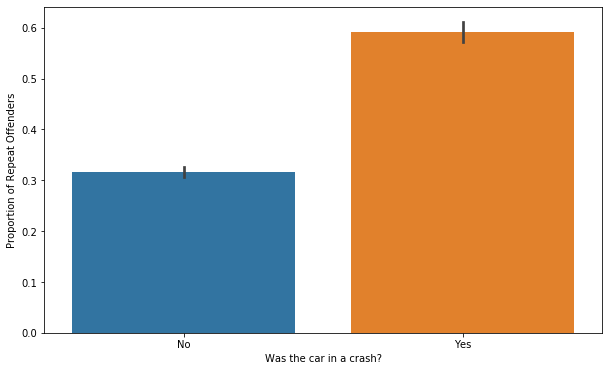

In [32]:
print("How many drivers whose car was in a crash made repeat claims?")
print("{:.2%}".format(df["REPEAT"][df["CLAIM_FLAG"] == 1].value_counts(normalize = True)[1]))

print("How many drivers whose car wasn't in a crash made repeat claims?")
print("{:.2%}".format(df["REPEAT"][df["CLAIM_FLAG"] == 0].value_counts(normalize = True)[1]))
figure(figsize=(10,6))
sns.barplot(x='CLAIM_FLAG',y="REPEAT", data=df)
plt.xlabel('Was the car in a crash?')
plt.xticks([0,1],labels=['No','Yes'])
plt.ylabel("Proportion of Repeat Offenders")
plt.show()

Whether or not the car was in a crash for this particular insurance claim seems to have a large effect on whether or not the driver made repeat claims - 59% vs 32%!

## Part 4: Machine Learning Models
The features which have had the most effect on the likelihood of repeat insurance claims were discovered above. Those are:
- Urbanicity (Boolean)
- Number of Demerit Points
- Age 
- Revoked License Status (Boolean)
- Car Crash Status (Boolean)

Our prediction target is the variable REPEAT.

In [33]:
y = df.REPEAT

In [34]:
y.value_counts()

0    6292
1    4010
Name: REPEAT, dtype: int64

In [35]:
df['REVOKED'].value_counts()

No     9041
Yes    1261
Name: REVOKED, dtype: int64

In [36]:
# convert feature columns to numerical variables
df['URBANICITY'] = df.URBANICITY.apply(lambda x: 0 if x == 'Rural' else 1)
df['REVOKED'] = df.REVOKED.apply(lambda x: 0 if x == 'No' else 1)

In [37]:
features = ['URBANICITY', 'MVR_PTS', 'AGE', 'REVOKED', 'CLAIM_FLAG']

In [38]:
X = df[features]

In [39]:
X

,URBANICITY,MVR_PTS,AGE,REVOKED,CLAIM_FLAG
0,1,3,60.0,0,0
1,1,0,43.0,0,0
2,1,2,48.0,0,0
3,1,3,35.0,0,0
4,1,0,51.0,0,0
...,...,...,...,...,...
10297,1,2,45.0,0,0
10298,1,0,46.0,0,0
10299,1,0,48.0,0,0
10300,1,0,50.0,0,0


In [40]:
X.describe()

,URBANICITY,MVR_PTS,AGE,REVOKED,CLAIM_FLAG
count,10302.000000,10302.000000,10302.000000,10302.000000,10302.000000
mean,0.798874,1.710153,44.837397,0.122403,0.266550
std,0.400861,2.159015,8.603520,0.327767,0.442177
min,0.000000,0.000000,16.000000,0.000000,0.000000
25%,1.000000,0.000000,39.000000,0.000000,0.000000
50%,1.000000,1.000000,45.000000,0.000000,0.000000
75%,1.000000,3.000000,51.000000,0.000000,1.000000
max,1.000000,13.000000,81.000000,1.000000,1.000000


In [41]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0, stratify=y)

Scaling feature variables:

In [42]:
from sklearn.preprocessing import StandardScaler

In [43]:
scaler  = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test  = scaler.transform(X_test)

### KNN

In [44]:
import sklearn.metrics as skm

In [45]:
from sklearn.neighbors import KNeighborsClassifier

In [46]:
knn = KNeighborsClassifier()

knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [47]:
preds = knn.predict(X_test)

In [48]:
print("First draft KNN results:")
print("Accuracy:  " + str(round(skm.accuracy_score(y_true=y_test,y_pred=preds) * 100, 2)) + "%")
print("Precision: " + str(round(skm.precision_score(y_true=y_test,y_pred=preds,average='weighted') * 100, 2)) + "%")
print("Recall:    " + str(round(skm.recall_score(y_true=y_test,y_pred=preds,average='weighted') * 100, 2)) + "%")
print("F1-Score:  " + str(round(skm.f1_score(y_true=y_test,y_pred=preds,average='weighted') * 100, 2)) + "%")

First draft KNN results:
Accuracy:  70.69%
Precision: 70.33%
Recall:    70.69%
F1-Score:  70.44%


#### Tuning KNN

In [49]:
from sklearn.model_selection import GridSearchCV

params = {
    'n_neighbors': [31,35,41,45,51,55],
    'weights': ['uniform', 'distance'],
    'p': [1,2]
}

grid = GridSearchCV(KNeighborsClassifier(),
                   params,
                   verbose=1)

grid_results = grid.fit(X_train, y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 120 out of 120 | elapsed:    7.1s finished


In [50]:
knn = grid_results.best_estimator_

In [51]:
preds = knn.predict(X_test)

In [52]:
print("Tuned KNN results:")
print("Accuracy:  " + str(round(skm.accuracy_score(y_true=y_test,y_pred=preds) * 100, 2)) + "%")
print("Precision: " + str(round(skm.precision_score(y_true=y_test,y_pred=preds,average='weighted') * 100, 2)) + "%")
print("Recall:    " + str(round(skm.recall_score(y_true=y_test,y_pred=preds,average='weighted') * 100, 2)) + "%")
print("F1-Score:  " + str(round(skm.f1_score(y_true=y_test,y_pred=preds,average='weighted') * 100, 2)) + "%")

Tuned KNN results:
Accuracy:  74.09%
Precision: 73.78%
Recall:    74.09%
F1-Score:  73.29%


In [53]:
knn_cfmat = skm.confusion_matrix(
    y_true=y_test,
    y_pred=preds)

Text(0.5, 1, 'KNN Confusion Matrix')

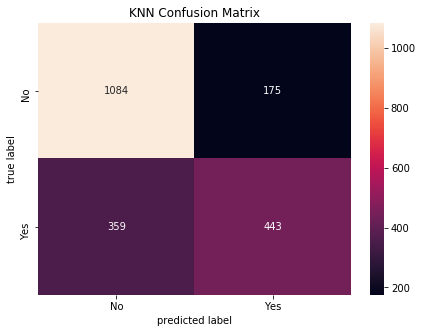

In [54]:
fig, ax = plt.subplots(figsize=(7,5))
sns.heatmap(knn_cfmat, 
            xticklabels=['No', 'Yes'],
            yticklabels=['No', 'Yes'],
            annot=True,
            fmt='g')
plt.xlabel('predicted label')
plt.ylabel('true label')
plt.title('KNN Confusion Matrix')

### Naive Bayes

In [55]:
from sklearn.naive_bayes import GaussianNB

In [56]:
gnb = GaussianNB(var_smoothing=0.1)

In [57]:
gnb.fit(X_train,y_train)

GaussianNB(priors=None, var_smoothing=0.1)

In [58]:
preds = gnb.predict(X_test)

In [59]:
print("GaussianNB results:")
print("Accuracy:  " + str(round(skm.accuracy_score(y_true=y_test,y_pred=preds) * 100, 2)) + "%")
print("Precision: " + str(round(skm.precision_score(y_true=y_test,y_pred=preds,average='weighted') * 100, 2)) + "%")
print("Recall:    " + str(round(skm.recall_score(y_true=y_test,y_pred=preds,average='weighted') * 100, 2)) + "%")
print("F1-Score:  " + str(round(skm.f1_score(y_true=y_test,y_pred=preds,average='weighted') * 100, 2)) + "%")

GaussianNB results:
Accuracy:  73.31%
Precision: 73.43%
Recall:    73.31%
F1-Score:  73.37%


In [60]:
gnb_cfmat = skm.confusion_matrix(
    y_true=y_test,
    y_pred=preds)

Text(0.5, 1, 'GNB Confusion Matrix')

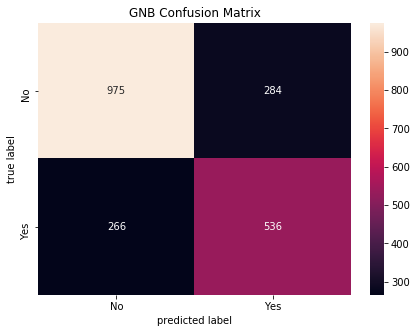

In [61]:
fig, ax = plt.subplots(figsize=(7,5))
sns.heatmap(gnb_cfmat, 
            xticklabels=['No', 'Yes'],
            yticklabels=['No', 'Yes'],
            annot=True,
            fmt='g')
plt.xlabel('predicted label')
plt.ylabel('true label')
plt.title('GNB Confusion Matrix')

### Logistic Regression

In [62]:
from sklearn.linear_model import LogisticRegression

In [63]:
lr = LogisticRegression(C=0.01, solver='newton-cg')

In [64]:
lr.fit(X_train, y_train)

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False)

In [65]:
preds = lr.predict(X_test)

In [66]:
print("Logistic Regression results:")
print("Accuracy:  " + str(round(skm.accuracy_score(y_true=y_test,y_pred=preds) * 100, 2)) + "%")
print("Precision: " + str(round(skm.precision_score(y_true=y_test,y_pred=preds,average='weighted') * 100, 2)) + "%")
print("Recall:    " + str(round(skm.recall_score(y_true=y_test,y_pred=preds,average='weighted') * 100, 2)) + "%")
print("F1-Score:  " + str(round(skm.f1_score(y_true=y_test,y_pred=preds,average='weighted') * 100, 2)) + "%")

Logistic Regression results:
Accuracy:  75.21%
Precision: 75.02%
Recall:    75.21%
F1-Score:  74.4%


In [67]:
lr_cfmat = skm.confusion_matrix(
    y_true=y_test,
    y_pred=preds)

Text(0.5, 1, 'LR Confusion Matrix')

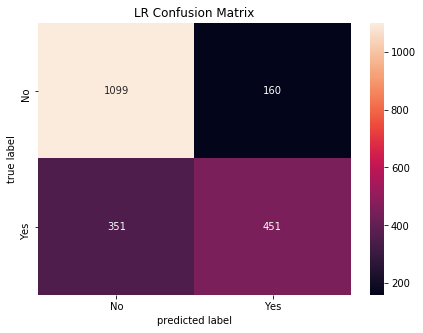

In [68]:
fig, ax = plt.subplots(figsize=(7,5))
sns.heatmap(lr_cfmat, 
            xticklabels=['No', 'Yes'],
            yticklabels=['No', 'Yes'],
            annot=True,
            fmt='g')
plt.xlabel('predicted label')
plt.ylabel('true label')
plt.title('LR Confusion Matrix')

### SVM

In [69]:
from sklearn.svm import SVC

In [70]:
svc = SVC(C=0.1, 
          kernel='rbf', 
          gamma='auto', 
         )

In [71]:
svc.fit(X_train, y_train)

SVC(C=0.1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [94]:
preds = svc.predict(X_test)

In [95]:
print("SVM results:")
print("Accuracy:  " + str(round(skm.accuracy_score(y_true=y_test,y_pred=preds) * 100, 2)) + "%")
print("Precision: " + str(round(skm.precision_score(y_true=y_test,y_pred=preds,average='weighted') * 100, 2)) + "%")
print("Recall:    " + str(round(skm.recall_score(y_true=y_test,y_pred=preds,average='weighted') * 100, 2)) + "%")
print("F1-Score:  " + str(round(skm.f1_score(y_true=y_test,y_pred=preds,average='weighted') * 100, 2)) + "%")

SVM results:
Accuracy:  75.25%
Precision: 75.26%
Recall:    75.25%
F1-Score:  74.26%


In [96]:
svc_cfmat = skm.confusion_matrix(
    y_true=y_test,
    y_pred=preds)

Text(0.5, 1, 'SVM Confusion Matrix')

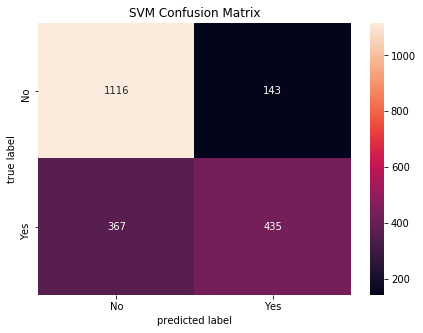

In [97]:
fig, ax = plt.subplots(figsize=(7,5))
sns.heatmap(svc_cfmat, 
            xticklabels=['No', 'Yes'],
            yticklabels=['No', 'Yes'],
            annot=True,
            fmt='g')
plt.xlabel('predicted label')
plt.ylabel('true label')
plt.title('SVM Confusion Matrix')

### Random Forest

In [76]:
from sklearn.ensemble import RandomForestClassifier

In [77]:
rfc = RandomForestClassifier(n_estimators=100)

In [99]:
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [100]:
preds = rfc.predict(X_test)

In [101]:
print("RFC results:")
print("Accuracy:  " + str(round(skm.accuracy_score(y_true=y_test,y_pred=preds) * 100, 2)) + "%")
print("Precision: " + str(round(skm.precision_score(y_true=y_test,y_pred=preds,average='weighted') * 100, 2)) + "%")
print("Recall:    " + str(round(skm.recall_score(y_true=y_test,y_pred=preds,average='weighted') * 100, 2)) + "%")
print("F1-Score:  " + str(round(skm.f1_score(y_true=y_test,y_pred=preds,average='weighted') * 100, 2)) + "%")

RFC results:
Accuracy:  72.59%
Precision: 72.12%
Recall:    72.59%
F1-Score:  71.87%


In [81]:
rfc_cfmat = skm.confusion_matrix(
    y_true=y_test,
    y_pred=preds)

Text(0.5, 1, 'RFC Confusion Matrix')

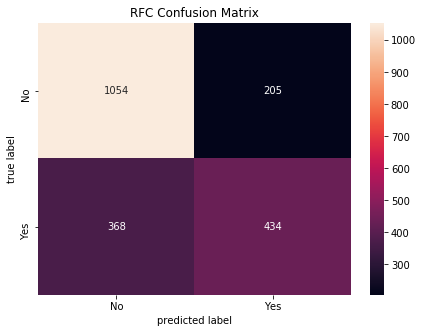

In [102]:
fig, ax = plt.subplots(figsize=(7,5))
sns.heatmap(rfc_cfmat, 
            xticklabels=['No', 'Yes'],
            yticklabels=['No', 'Yes'],
            annot=True,
            fmt='g')
plt.xlabel('predicted label')
plt.ylabel('true label')
plt.title('RFC Confusion Matrix')

#### Tuning RFC

In [83]:
from sklearn.model_selection import RandomizedSearchCV

In [84]:
n_estimators = [int(x) for x in np.linspace(start=100,stop=2000,num=10)]
max_features = ['auto','sqrt']
max_depth = [int(x) for x in np.linspace(10,110,num=11)]

In [85]:
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth}

In [86]:
rfc = RandomForestClassifier()

In [87]:
rf_random = RandomizedSearchCV(rfc,
                               random_grid,
                               n_iter = 100,
                               cv = 3,
                               verbose = 2,
                               n_jobs = -1)

In [88]:
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  29 tasks      | elapsed:   25.7s
[Parallel(n_jobs=-1)]: Done 150 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  3.5min finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [89]:
rf_random.best_params_

{'n_estimators': 100, 'max_features': 'auto', 'max_depth': 10}

In [90]:
best_rfc = rf_random.best_estimator_

In [91]:
preds = best_rfc.predict(X_test)

In [92]:
print("RFC results:")
print("Accuracy:  " + str(round(skm.accuracy_score(y_true=y_test,y_pred=preds) * 100, 2)) + "%")
print("Precision: " + str(round(skm.precision_score(y_true=y_test,y_pred=preds,average='weighted') * 100, 2)) + "%")
print("Recall:    " + str(round(skm.recall_score(y_true=y_test,y_pred=preds,average='weighted') * 100, 2)) + "%")
print("F1-Score:  " + str(round(skm.f1_score(y_true=y_test,y_pred=preds,average='weighted') * 100, 2)) + "%")

RFC results:
Accuracy:  74.72%
Precision: 74.49%
Recall:    74.72%
F1-Score:  73.92%


#### The highest accuracy score we achieved was 75.25%, using Support Vector Machines.
Can we improve the model any further?

In [93]:
svc

SVC(C=0.1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

### Feature Importance

In [110]:
X.head()

,URBANICITY,MVR_PTS,AGE,REVOKED,CLAIM_FLAG
0,1,3,60.0,0,0
1,1,0,43.0,0,0
2,1,2,48.0,0,0
3,1,3,35.0,0,0
4,1,0,51.0,0,0


In [112]:
feature_importance = pd.Series(rfc.feature_importances_,index=X.columns).sort_values(ascending=False)
feature_importance

MVR_PTS       0.448472
AGE           0.338784
URBANICITY    0.120705
CLAIM_FLAG    0.078746
REVOKED       0.013292
dtype: float64

Text(0.5, 0, 'Importance of Feature')

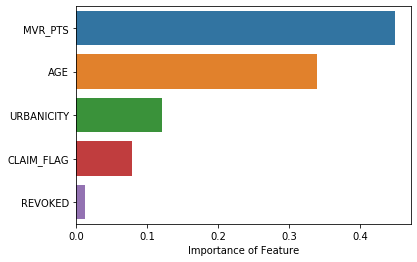

In [114]:
sns.barplot(x=feature_importance, y=feature_importance.index)
plt.xlabel('Importance of Feature')

In [115]:
# remove revoked as a feature
new_features = ['MVR_PTS', 'AGE', 'URBANICITY', 'CLAIM_FLAG']
X = df[new_features]

In [117]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0, stratify=y)

In [118]:
scaler  = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test  = scaler.transform(X_test)

In [151]:
svc = SVC(C=10, 
          kernel='rbf', 
          gamma='auto', 
         )

In [152]:
svc.fit(X_train, y_train)

SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [153]:
preds = svc.predict(X_test)

In [154]:
print("SVM results:")
print("Accuracy:  " + str(round(skm.accuracy_score(y_true=y_test,y_pred=preds) * 100, 2)) + "%")
print("Precision: " + str(round(skm.precision_score(y_true=y_test,y_pred=preds,average='weighted') * 100, 2)) + "%")
print("Recall:    " + str(round(skm.recall_score(y_true=y_test,y_pred=preds,average='weighted') * 100, 2)) + "%")
print("F1-Score:  " + str(round(skm.f1_score(y_true=y_test,y_pred=preds,average='weighted') * 100, 2)) + "%")

SVM results:
Accuracy:  75.3%
Precision: 75.23%
Recall:    75.3%
F1-Score:  74.39%


In [155]:
svc_cfmat = skm.confusion_matrix(
    y_true=y_test,
    y_pred=preds)

Text(0.5, 1, 'SVM Confusion Matrix')

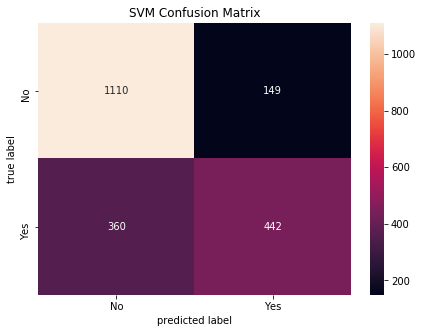

In [156]:
fig, ax = plt.subplots(figsize=(7,5))
sns.heatmap(svc_cfmat, 
            xticklabels=['No', 'Yes'],
            yticklabels=['No', 'Yes'],
            annot=True,
            fmt='g')
plt.xlabel('predicted label')
plt.ylabel('true label')
plt.title('SVM Confusion Matrix')

### Final product is a model which takes in # of Demerit Points, Age, Car Crash Status, and Urbanicity and predicts with 75.35% accuracy whether a customer will make more than one insurance claim.

#### Sources used:
Dataset from: https://www.kaggle.com/xiaomengsun/car-insurance-claim-data

Other sources: 
- http://rstudio-pubs-static.s3.amazonaws.com/325100_1db19d9fa2e8482c98af89a1d5d91802.html
- https://www.kaggle.com/nadintamer/titanic-survival-predictions
- https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html
- https://www.kaggle.com/dansbecker/model-validation
- https://scikit-learn.org/stable/auto_examples/index.html#classification
- https://scikit-learn.org/stable/auto_examples/tree/plot_tree_regression.html#sphx-glr-auto-examples-tree-plot-tree-regression-py